In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("federalreserve/interest-rates")

print("Path to dataset files:", path)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/manu13/.cache/kagglehub/datasets/federalreserve/interest-rates/versions/1


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd
import os

# Path to the directory 
data_dir = path

csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')] # check all data files
print(csv_files)


csv_file = os.path.join(data_dir, csv_files[0])

df = pd.read_csv(csv_file)
df



['index.csv']


,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
0,1954,7,1,NaN,NaN,NaN,0.80,4.6,5.8,NaN
1,1954,8,1,NaN,NaN,NaN,1.22,NaN,6.0,NaN
2,1954,9,1,NaN,NaN,NaN,1.06,NaN,6.1,NaN
3,1954,10,1,NaN,NaN,NaN,0.85,8.0,5.7,NaN
4,1954,11,1,NaN,NaN,NaN,0.83,NaN,5.3,NaN
...,...,...,...,...,...,...,...,...,...,...
899,2016,12,14,NaN,0.75,0.50,NaN,NaN,NaN,NaN
900,2017,1,1,NaN,0.75,0.50,0.65,NaN,4.8,2.3
901,2017,2,1,NaN,0.75,0.50,0.66,NaN,4.7,2.2
902,2017,3,1,NaN,0.75,0.50,NaN,NaN,NaN,NaN


In [4]:
# Turn full date into the index of the data frame

df = pd.read_csv(csv_file,
                 parse_dates={'Date': ['Year', 'Month', 'Day']},
                 index_col='Date',
                 )
df

/var/folders/j0/tqzlnmks6cx221q8pl95104w0000gn/T/ipykernel_12887/1172798612.py:3: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(csv_file,


,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
Date,,,,,,,
1954-07-01,NaN,NaN,NaN,0.80,4.6,5.8,NaN
1954-08-01,NaN,NaN,NaN,1.22,NaN,6.0,NaN
1954-09-01,NaN,NaN,NaN,1.06,NaN,6.1,NaN
1954-10-01,NaN,NaN,NaN,0.85,8.0,5.7,NaN
1954-11-01,NaN,NaN,NaN,0.83,NaN,5.3,NaN
...,...,...,...,...,...,...,...
2016-12-14,NaN,0.75,0.50,NaN,NaN,NaN,NaN
2017-01-01,NaN,0.75,0.50,0.65,NaN,4.8,2.3
2017-02-01,NaN,0.75,0.50,0.66,NaN,4.7,2.2


In [5]:
# Target by month

y = df.loc[:, 'Unemployment Rate'].dropna().to_period('M')
y

Date
1954-07    5.8
1954-08    6.0
1954-09    6.1
1954-10    5.7
1954-11    5.3
          ... 
2016-10    4.8
2016-11    4.6
2016-12    4.7
2017-01    4.8
2017-02    4.7
Freq: M, Name: Unemployment Rate, Length: 752, dtype: float64

In [6]:
# Dataset with two laggs

df_lag = pd.DataFrame({
    'y': y,
    'lag_1': y.shift(1),
    'lag_2': y.shift(2),
    'lag_3': y.shift(3),
    'lag_4': y.shift(4),
    'lag_5': y.shift(5),
})

df_lag

,y,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,
1954-07,5.8,NaN,NaN,NaN,NaN,NaN
1954-08,6.0,5.8,NaN,NaN,NaN,NaN
1954-09,6.1,6.0,5.8,NaN,NaN,NaN
1954-10,5.7,6.1,6.0,5.8,NaN,NaN
1954-11,5.3,5.7,6.1,6.0,5.8,NaN
...,...,...,...,...,...,...
2016-10,4.8,4.9,4.9,4.9,4.9,4.7
2016-11,4.6,4.8,4.9,4.9,4.9,4.9
2016-12,4.7,4.6,4.8,4.9,4.9,4.9


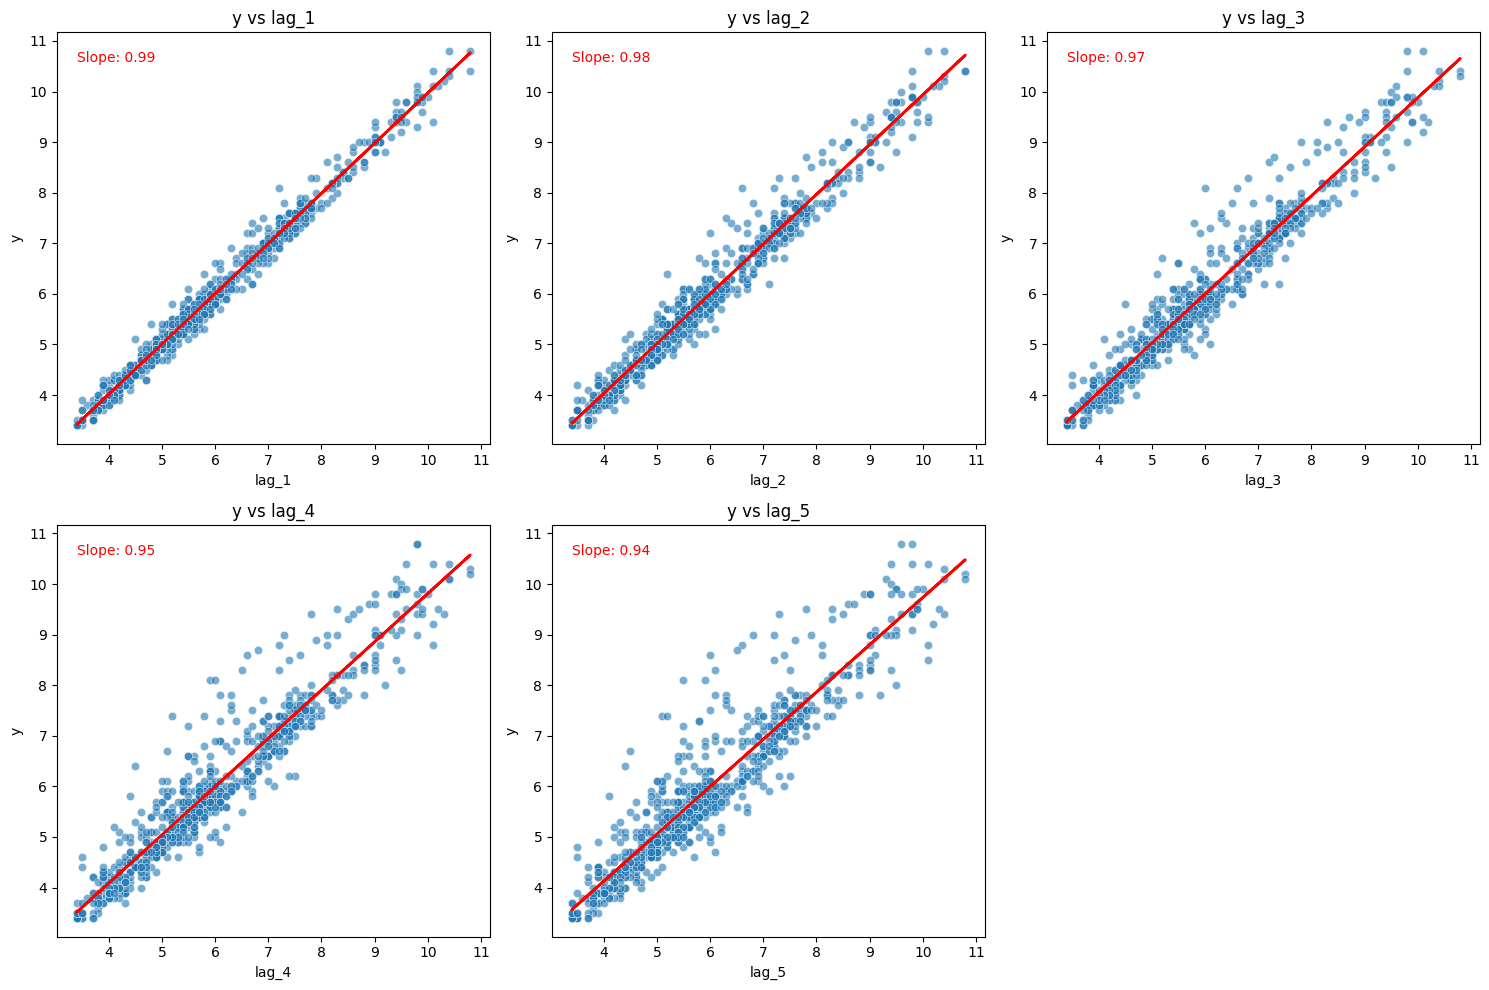

Autocorrelation at lag 1: 0.99
Autocorrelation at lag 2: 0.98
Autocorrelation at lag 3: 0.97
Autocorrelation at lag 4: 0.95
Autocorrelation at lag 5: 0.93


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

lags = ['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']

plt.figure(figsize=(15, 10))

for i, lag in enumerate(lags, 1):
    x = df_lag[lag]
    y = df_lag['y']
    mask = ~x.isna() & ~y.isna()  # Exclude NaNs

    # Fit linear regression
    slope, intercept = np.polyfit(x[mask], y[mask], 1)
    line = slope * x + intercept

    plt.subplot(2, 3, i)
    sns.scatterplot(x=x, y=y, alpha=0.6)
    plt.plot(x, line, color='red', linewidth=2)  # Line of best fit

    plt.title(f'y vs {lag}')
    plt.xlabel(lag)
    plt.ylabel('y')

    # Add slope annotation
    plt.text(x.min(), y.max(), f"Slope: {slope:.2f}", 
             fontsize=10, color='red', ha='left', va='top')

plt.tight_layout()
plt.show()


for lag in range(1, 6):
    corr = df_lag['y'].corr(df_lag[f'lag_{lag}'])
    print(f'Autocorrelation at lag {lag}: {corr:.2f}')



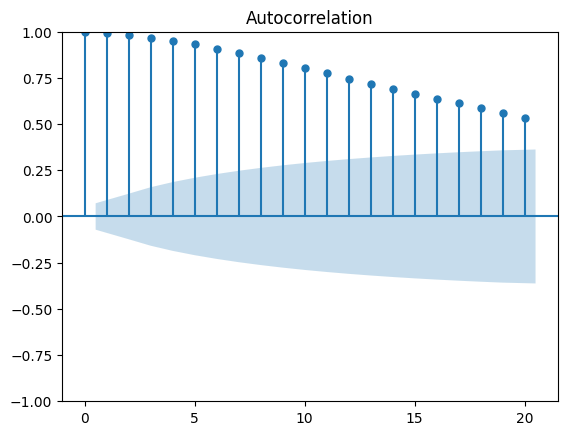

In [8]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(y.dropna(), lags=20)
plt.show()


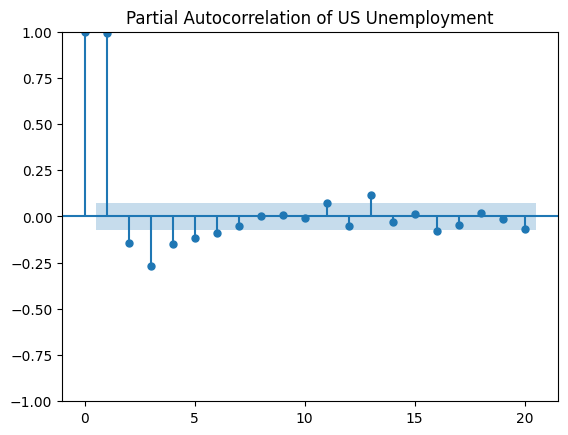

In [9]:
# The partial autocorrelation tells you the correlation 
# of a lag accounting for all of the previous lags 

from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(y.dropna(), lags=20, method='ywm')
plt.title('Partial Autocorrelation of US Unemployment')
plt.show()


In [10]:
# Now we can explore the flu trends data drame

In [11]:

from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.signal import periodogram
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_pacf

simplefilter("ignore")

# Set Matplotlib defaults
#plt.style.use("seaborn")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)
%config InlineBackend.figure_format = 'retina'


def lagplot(x, y=None, lag=1, standardize=False, ax=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(lag)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    ax.set(title=f"Lag {lag}", xlabel=x_.name, ylabel=y_.name)
    return ax


def plot_lags(x, y=None, lags=6, nrows=1, lagplot_kwargs={}, **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    kwargs.setdefault('ncols', math.ceil(lags / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        if k + 1 <= lags:
            ax = lagplot(x, y, lag=k + 1, ax=ax, **lagplot_kwargs)
            ax.set_title(f"Lag {k + 1}", fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig


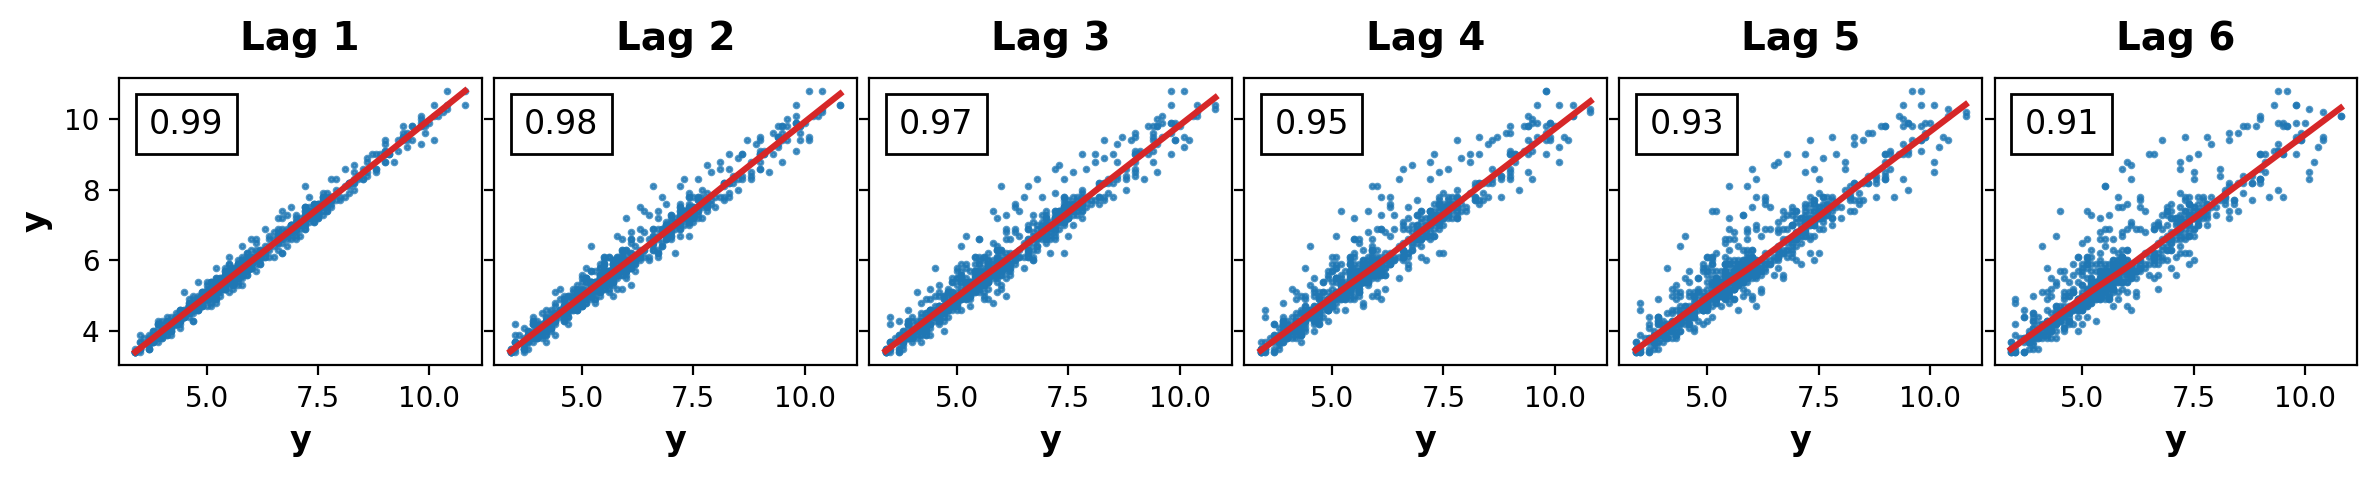

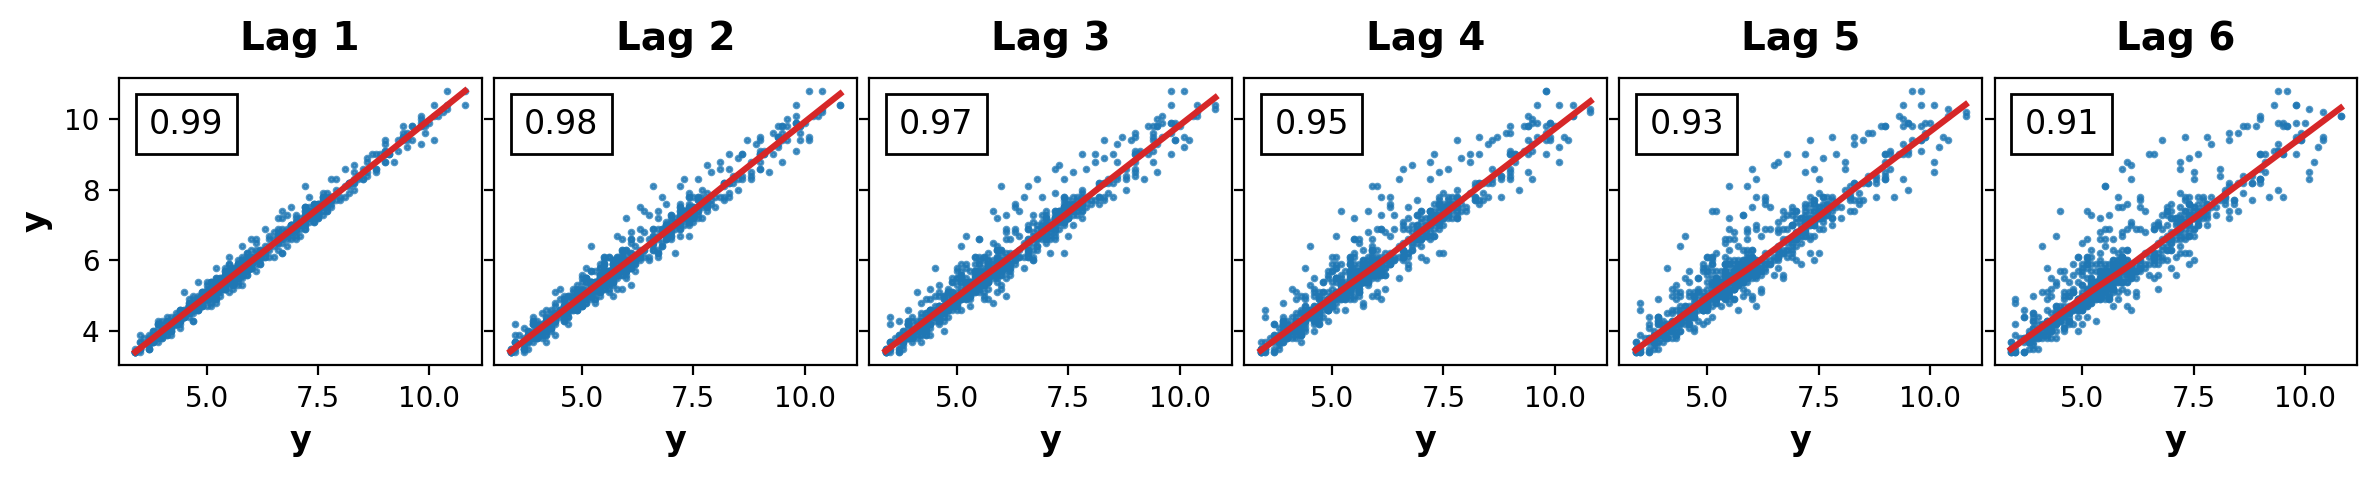

In [12]:
plot_lags(df_lag["y"])

In [13]:
df = df.fillna(method='ffill')
df

,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
Date,,,,,,,
1954-07-01,NaN,NaN,NaN,0.80,4.6,5.8,NaN
1954-08-01,NaN,NaN,NaN,1.22,4.6,6.0,NaN
1954-09-01,NaN,NaN,NaN,1.06,4.6,6.1,NaN
1954-10-01,NaN,NaN,NaN,0.85,8.0,5.7,NaN
1954-11-01,NaN,NaN,NaN,0.83,8.0,5.3,NaN
...,...,...,...,...,...,...,...
2016-12-14,1.0,0.75,0.50,0.54,1.9,4.7,2.2
2017-01-01,1.0,0.75,0.50,0.65,1.9,4.8,2.3
2017-02-01,1.0,0.75,0.50,0.66,1.9,4.7,2.2


In [14]:
def make_lags(ts, lags):
    return pd.concat(
        {
            f'y_lag_{i}': ts.shift(i)
            for i in range(1, lags + 1)
        },
        axis=1)


X = make_lags(y, lags=4)
X = X.fillna(0.0)

In [15]:
X

,y_lag_1,y_lag_2,y_lag_3,y_lag_4
Date,,,,
1954-07,0.0,0.0,0.0,0.0
1954-08,5.8,0.0,0.0,0.0
1954-09,6.0,5.8,0.0,0.0
1954-10,6.1,6.0,5.8,0.0
1954-11,5.7,6.1,6.0,5.8
...,...,...,...,...
2016-10,4.9,4.9,4.9,4.9
2016-11,4.8,4.9,4.9,4.9
2016-12,4.6,4.8,4.9,4.9


In [16]:
X.y_lag_3

Date
1954-07    0.0
1954-08    0.0
1954-09    0.0
1954-10    5.8
1954-11    6.0
          ... 
2016-10    4.9
2016-11    4.9
2016-12    4.9
2017-01    4.8
2017-02    4.6
Freq: M, Name: y_lag_3, Length: 752, dtype: float64

In [17]:
# Create target series and data splits
y = y.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=60, shuffle=False)

# Fit and predict
model = LinearRegression()  # `fit_intercept=True` since we didn't use DeterministicProcess
model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_train), index=y_train.index)
y_fore = pd.Series(model.predict(X_test), index=y_test.index)

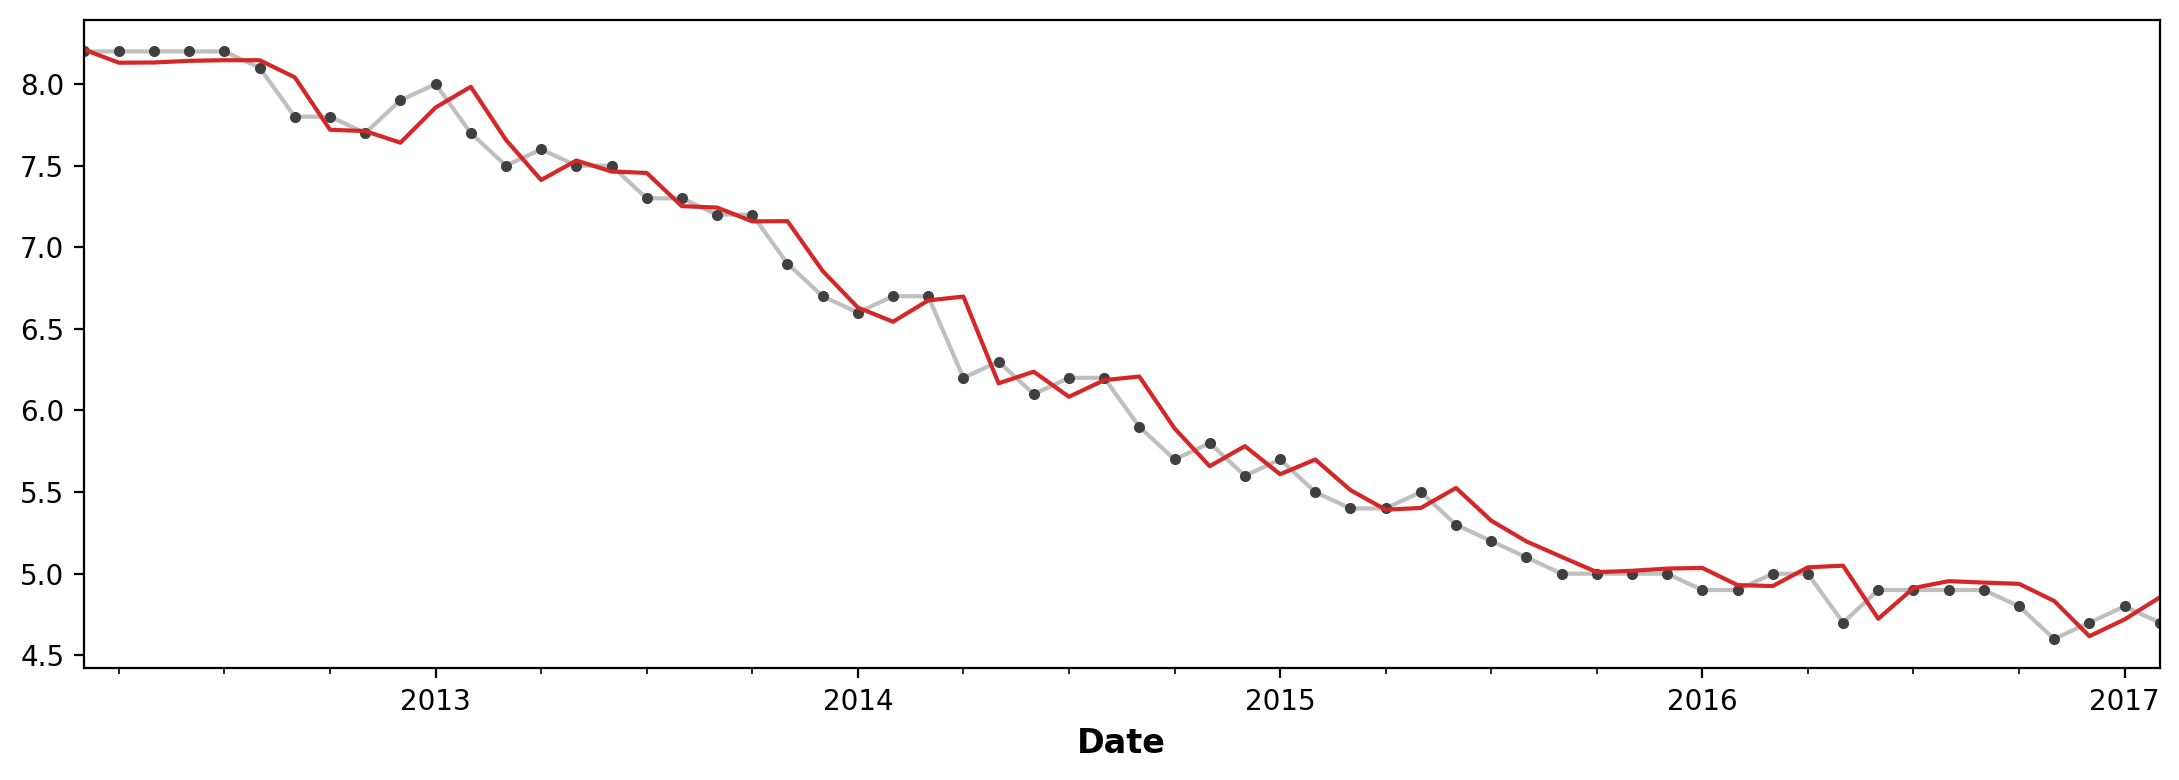

In [18]:

ax = y_test.plot(**plot_params)
_ = y_fore.plot(ax=ax, color='C3')

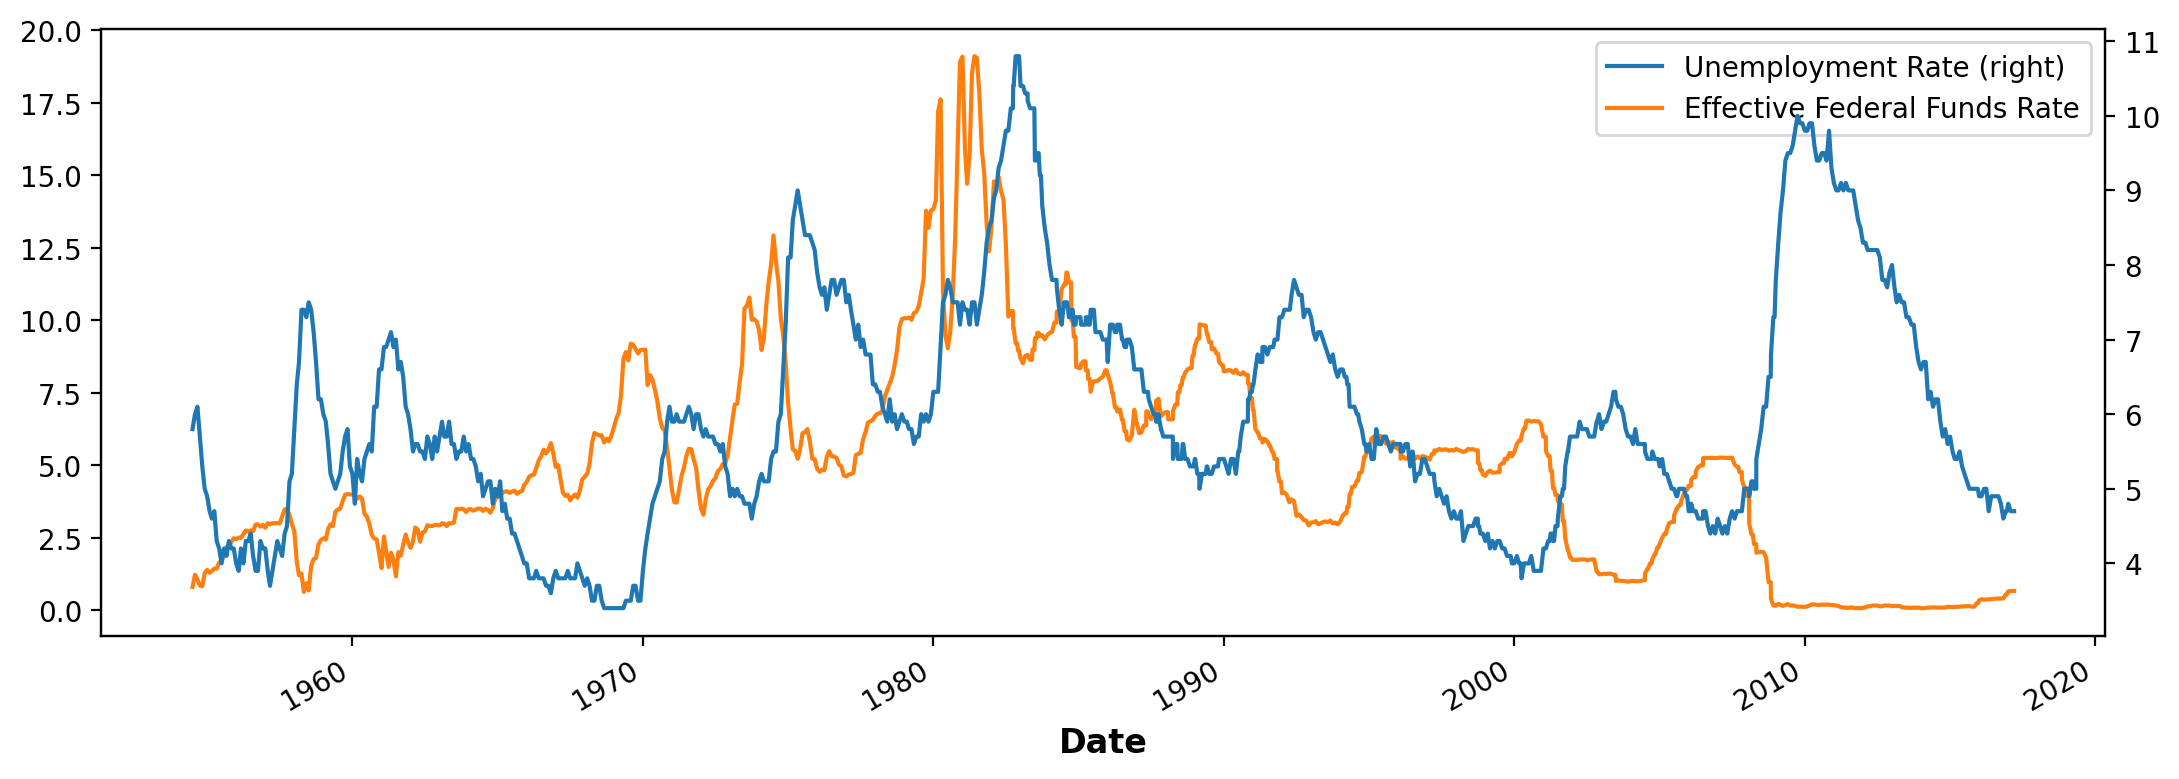

In [19]:
ax = df.plot(
    y=["Unemployment Rate", "Effective Federal Funds Rate"],
    secondary_y="Unemployment Rate",
)